In [217]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import os
import random
import shutil

In [218]:
random.seed(21)

In [219]:
def split_image_label_data(data_dir, output_dir, train_ratio=0.75, val_ratio=0.15, test_ratio=0.10):
    """Splits a folder of images and labels into train, val, and test sets.

    Args:
        data_dir (str): Path to the folder containing the 'images' and 'labels' subfolders.
        output_dir (str): Path to the output directory where the split folders will be created.
        train_ratio (float, optional): Ratio of data to allocate to the training set.
        val_ratio (float, optional): Ratio of data to allocate to the validation set.
        test_ratio (float, optional): Ratio of data to allocate to the test set.
    """

    # Error checking
    if not os.path.exists(data_dir):
        raise ValueError("Data directory does not exist.")
    if sum([train_ratio, val_ratio, test_ratio]) != 1:
        raise ValueError("Ratios must sum to 1.")

    # Create output directories
    for dataset in ['train', 'val', 'test']:
        dataset_dir = os.path.join(output_dir, dataset)
        os.makedirs(os.path.join(dataset_dir, 'images'), exist_ok=True)
        os.makedirs(os.path.join(dataset_dir, 'labels'), exist_ok=True)

    # Get image and label filenames
    image_dir = os.path.join(data_dir, 'images')
    label_dir = os.path.join(data_dir, 'labels')
    image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

    # Shuffle the files for random splitting
    random.shuffle(image_files)

    # Calculate split indices
    num_files = len(image_files)
    train_end_idx = int(num_files * train_ratio)
    val_end_idx = train_end_idx + int(num_files * val_ratio)

    # Split and copy files to respective folders
    for i, image_file in enumerate(image_files):
        label_file = os.path.splitext(image_file)[0] + '.txt'  # Assuming '.txt' labels
        if i < train_end_idx:
            dest_dir = os.path.join(output_dir, 'train')
        elif i < val_end_idx:
            dest_dir = os.path.join(output_dir, 'val')
        else:
            dest_dir = os.path.join(output_dir, 'test')

        shutil.copy(os.path.join(image_dir, image_file), os.path.join(dest_dir, 'images'))
        shutil.copy(os.path.join(label_dir, label_file), os.path.join(dest_dir, 'labels'))


data_dir = "datasets/mdp-640.v7i.yolov8/train"
output_dir = "datasets/yolo_dataset"
split_image_label_data(data_dir, output_dir) 

['Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_C', 'Alphabet_C', 'Alphabet_C', 'Alphabet_C', 'Alphabet_C', 'Alphabet_C', 'Alphabet_C', 'Alphabet_C', 'Alphabet_C', 'Alphabet_C', 'Alphabet_C', 'Alphabet_C', 'Alphabet_C', 'Alphabet_C', 'Alphabet_C', 'Alphabet_C', 'Alphabet_C', 'Alphabet_C', 'Alphabet_C', 'Alph

(array([31., 21., 31., 30., 33., 34., 31., 27., 22., 30., 31., 28., 27.,
        26., 34., 30., 28., 28., 32., 25., 28., 29., 30., 32., 33., 28.,
        30., 32., 29., 27., 31.]),
 array([ 0.        ,  0.96774194,  1.93548387,  2.90322581,  3.87096774,
         4.83870968,  5.80645161,  6.77419355,  7.74193548,  8.70967742,
         9.67741935, 10.64516129, 11.61290323, 12.58064516, 13.5483871 ,
        14.51612903, 15.48387097, 16.4516129 , 17.41935484, 18.38709677,
        19.35483871, 20.32258065, 21.29032258, 22.25806452, 23.22580645,
        24.19354839, 25.16129032, 26.12903226, 27.09677419, 28.06451613,
        29.03225806, 30.        ]),
 <BarContainer object of 31 artists>)

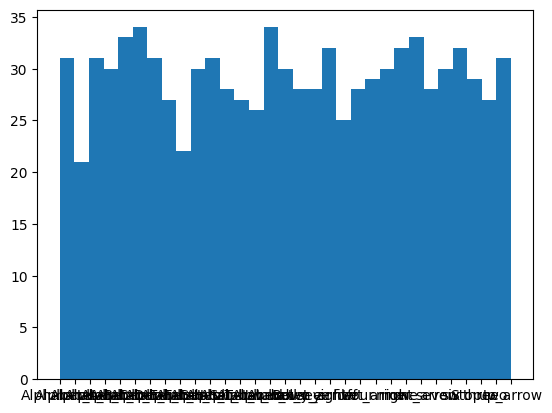

In [220]:
#check if all datasets contain all classes
import os

path = "datasets/yolo_dataset/train/images"
files_list = [f for f in os.listdir(path) if os.path.isfile(f"{path}/{f}")]
files_list = list(map(lambda x: x.rsplit('_', 2)[0], files_list))
print(files_list)
print(len(np.unique(files_list)))
print(Counter(files_list))
plt.hist(files_list, bins=31)

['Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_C', 'Alphabet_C', 'Alphabet_C', 'Alphabet_C', 'Alphabet_C', 'Alphabet_C', 'Alphabet_D', 'Alphabet_D', 'Alphabet_D', 'Alphabet_E', 'Alphabet_E', 'Alphabet_E', 'Alphabet_E', 'Alphabet_F', 'Alphabet_F', 'Alphabet_F', 'Alphabet_G', 'Alphabet_G', 'Alphabet_G', 'Alphabet_G', 'Alphabet_G', 'Alphabet_H', 'Alphabet_H', 'Alphabet_H', 'Alphabet_H', 'Alphabet_H', 'Alphabet_H', 'Alphabet_H', 'Alphabet_H', 'Alphabet_H', 'Alphabet_S', 'Alphabet_S', 'Alphabet_S', 'Alphabet_S', 'Alphabet_S', 'Alphabet_S', 'Alphabet_S', 'Alphabet_T', 'Alphabet_T', 'Alphabet_T', 'Alphabet_T', 'Alphabet_T', 'Alphabet_U', 'Alphabet_U', 'Alphabet_U', 'Alphabet_U', 'Alphabet_U', 'Alphabet_v', 'Alphabet_v', 'Alphabet_v', 'Alphabet_v', 'Alphabet_v', 'Alphabet_v', 'Alphabet_v', 'Alphabet_v', 'Alphabet_v', 'Alph

(array([ 4., 11.,  6.,  3.,  4.,  3.,  5.,  9.,  7.,  5.,  5.,  9.,  5.,
        10.,  4.,  6.,  9.,  7.,  5.,  9.,  7.,  5.,  5.,  3.,  4.,  5.,
         4.,  4.,  4.,  9.,  5.]),
 array([ 0.        ,  0.96774194,  1.93548387,  2.90322581,  3.87096774,
         4.83870968,  5.80645161,  6.77419355,  7.74193548,  8.70967742,
         9.67741935, 10.64516129, 11.61290323, 12.58064516, 13.5483871 ,
        14.51612903, 15.48387097, 16.4516129 , 17.41935484, 18.38709677,
        19.35483871, 20.32258065, 21.29032258, 22.25806452, 23.22580645,
        24.19354839, 25.16129032, 26.12903226, 27.09677419, 28.06451613,
        29.03225806, 30.        ]),
 <BarContainer object of 31 artists>)

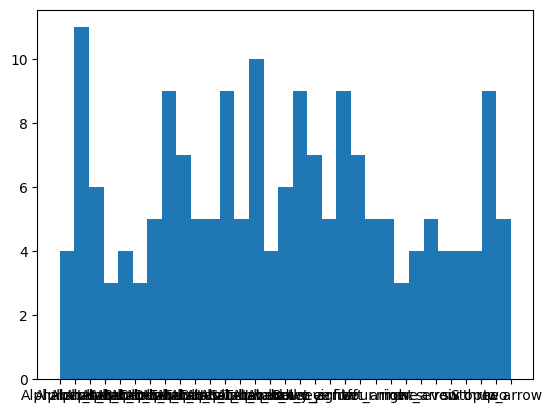

In [221]:
path = "datasets/yolo_dataset/val/images"
files_list = [f for f in os.listdir(path) if os.path.isfile(f"{path}/{f}")]
files_list = list(map(lambda x: x.rsplit('_', 2)[0], files_list))
print(files_list)
print(len(np.unique(files_list)))
print(Counter(files_list))
plt.hist(files_list, bins=31)

['Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_A', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_B', 'Alphabet_C', 'Alphabet_C', 'Alphabet_D', 'Alphabet_D', 'Alphabet_D', 'Alphabet_D', 'Alphabet_D', 'Alphabet_D', 'Alphabet_E', 'Alphabet_E', 'Alphabet_F', 'Alphabet_F', 'Alphabet_G', 'Alphabet_G', 'Alphabet_G', 'Alphabet_H', 'Alphabet_H', 'Alphabet_H', 'Alphabet_S', 'Alphabet_S', 'Alphabet_S', 'Alphabet_S', 'Alphabet_S', 'Alphabet_S', 'Alphabet_S', 'Alphabet_S', 'Alphabet_S', 'Alphabet_S', 'Alphabet_T', 'Alphabet_T', 'Alphabet_T', 'Alphabet_T', 'Alphabet_U', 'Alphabet_U', 'Alphabet_U', 'Alphabet_v', 'Alphabet_v', 'Alphabet_w', 'Alphabet_w', 'Alphabet_w', 'Alphabet_w', 'Alphabet_w', 'Alphabet_w', 'Alphabet_w', 'Alphabet_x', 'Alphabet_x', 'Alphabet_x', 'Alphabet_y', 'Alphabet_z', 'Alphabet_z', 'Alphabet_z', 'Bullseye', 'Bullseye', 'Bullseye', 'down_arrow', 'down_arrow', 'down_arrow', 'down_arrow', 'eight', 'eight', 'five', 'five', 'five

(array([ 4.,  7.,  2.,  6.,  2.,  2.,  3.,  3., 10.,  4.,  3.,  2.,  7.,
         3.,  1.,  3.,  3.,  4.,  2.,  5.,  4.,  5.,  4.,  4.,  3.,  6.,
         5.,  3.,  6.,  3.,  3.]),
 array([ 0.        ,  0.96774194,  1.93548387,  2.90322581,  3.87096774,
         4.83870968,  5.80645161,  6.77419355,  7.74193548,  8.70967742,
         9.67741935, 10.64516129, 11.61290323, 12.58064516, 13.5483871 ,
        14.51612903, 15.48387097, 16.4516129 , 17.41935484, 18.38709677,
        19.35483871, 20.32258065, 21.29032258, 22.25806452, 23.22580645,
        24.19354839, 25.16129032, 26.12903226, 27.09677419, 28.06451613,
        29.03225806, 30.        ]),
 <BarContainer object of 31 artists>)

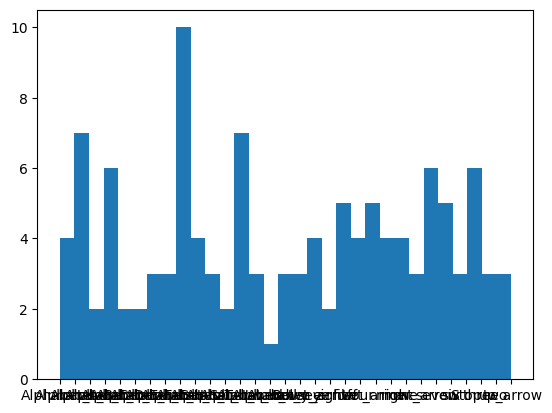

In [222]:
path = "datasets/yolo_dataset/test/images"
files_list = [f for f in os.listdir(path) if os.path.isfile(f"{path}/{f}")]
files_list = list(map(lambda x: x.rsplit('_', 2)[0], files_list))
print(files_list)
print(len(np.unique(files_list)))
print(Counter(files_list))
plt.hist(files_list, bins=31)